# Hello OneFormer Image Segmentation Model

OneFormer is a unified model that can do semantic, instance, or panoptic segmenatation

In [6]:
# Prerequisites and Dependencies 
import os
from PIL import Image
import requests
import matplotlib.pyplot as plt
from transformers import OneFormerProcessor, OneFormerForUniversalSegmentation

# Dependencies 
#pip3 install transformers
#pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu129    # for CUDA 12.9
#pip install scipy



### Visualization Helper

In [2]:
def show_image_comparison(image, predicted_map, segmentation_title):
    """Vidualize the original image and the segmented image side-by-side.

    Args:
        image (PIL.Image): The original image.
        predicted_map (PIL.Image): The segmented image.
        segmentation_title (str): The title for the visualizaion.
    """

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_map)
    plt.title(segmentation_title)
    plt.axis("off")
    plt.show()

### Run the Pre-trained model

Picture: abu_dhabi_camel.jpg


d:\MyGithub\ML_2D_Image_Segmentation_Experiments\.venv\Lib\site-packages\transformers\image_processing_base.py:417: UserWarning: The following named arguments are not valid for `OneFormerImageProcessor.__init__` and were ignored: '_max_size', 'reduce_labels'
  image_processor = cls(**image_processor_dict)


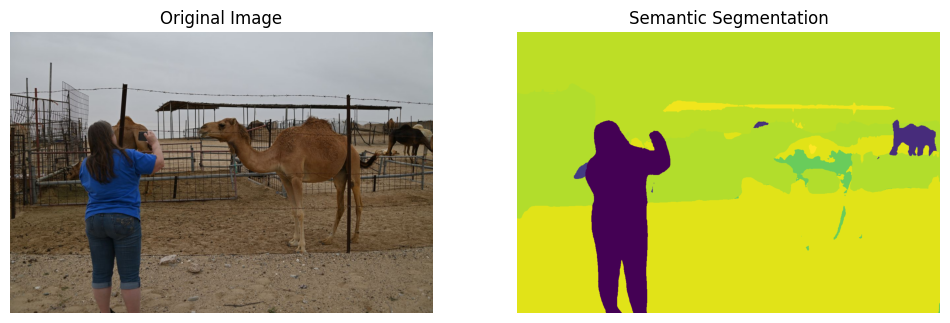

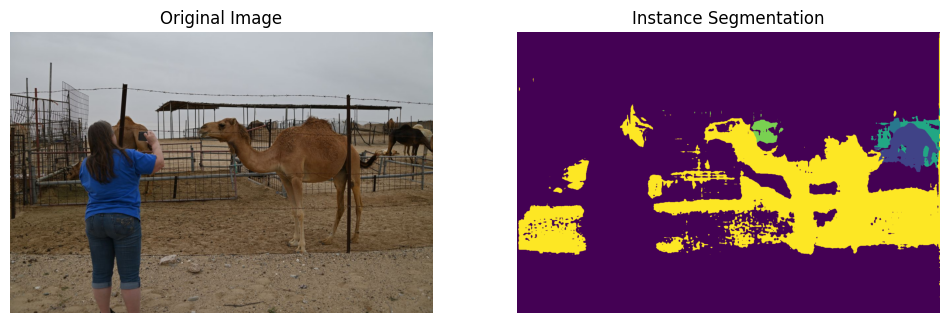

`label_ids_to_fuse` unset. No instance will be fused.


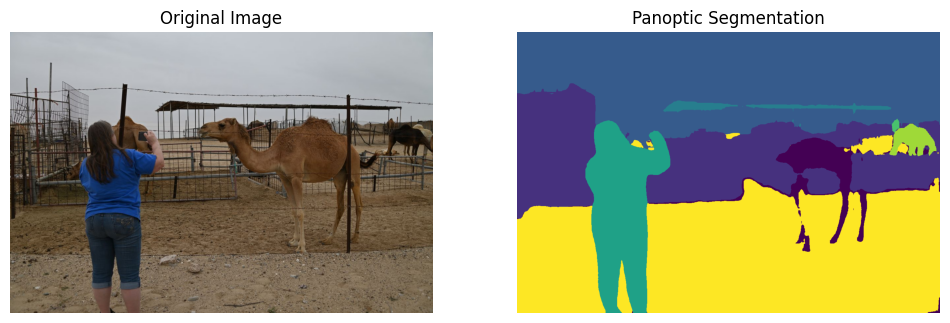

Picture: auto_rigshaws.jpg


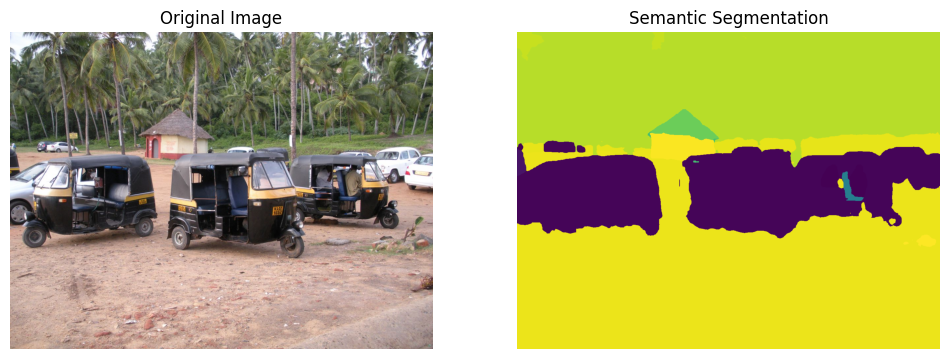

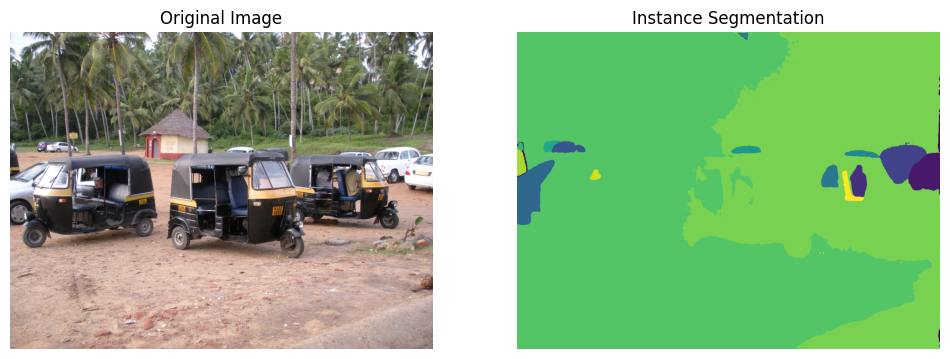

`label_ids_to_fuse` unset. No instance will be fused.


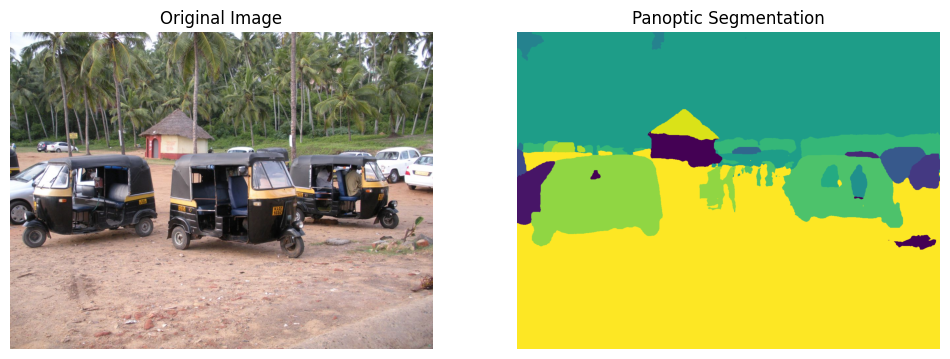

Picture: cargo_ship.jpg


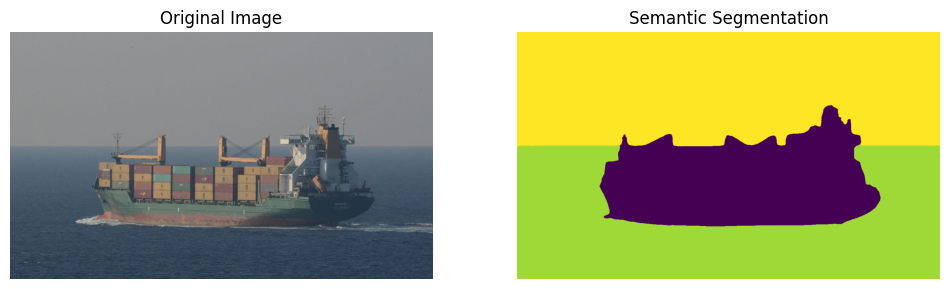

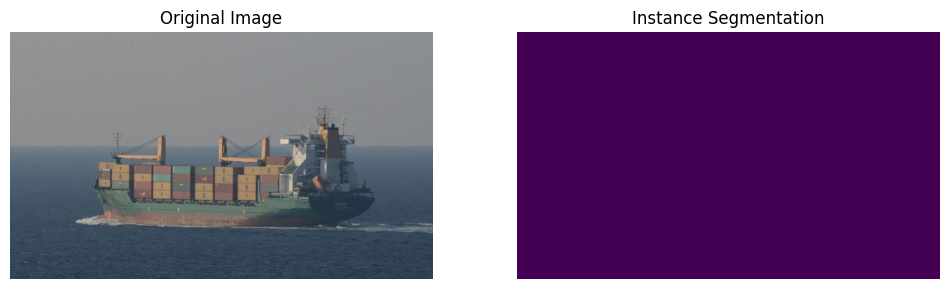

`label_ids_to_fuse` unset. No instance will be fused.


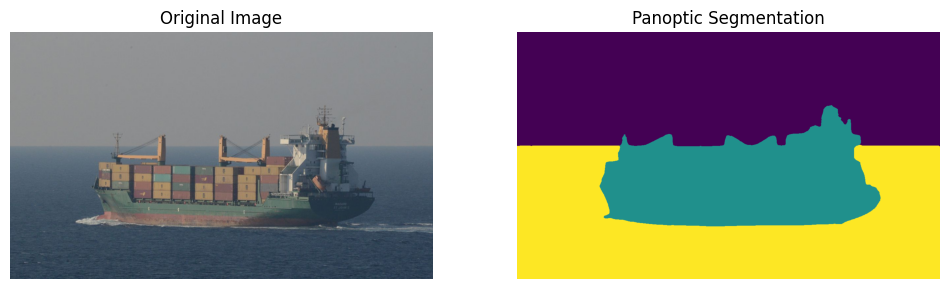

Picture: elephant.jpg


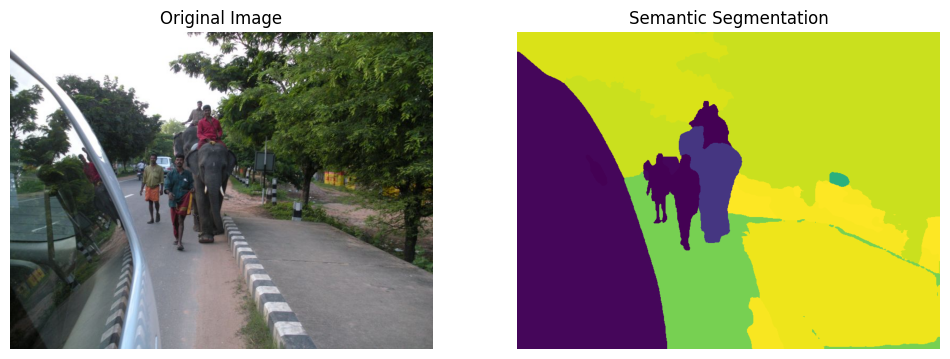

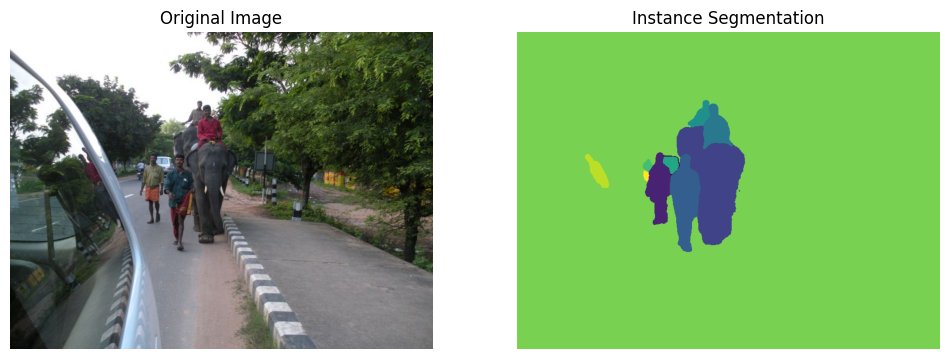

`label_ids_to_fuse` unset. No instance will be fused.


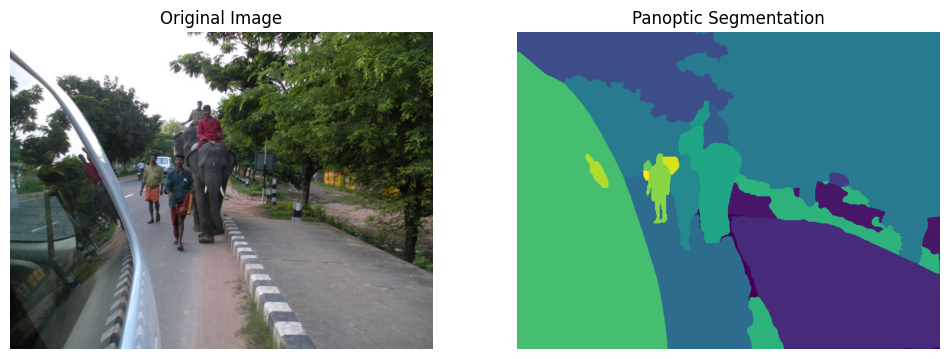

Picture: miami_beach.jpg


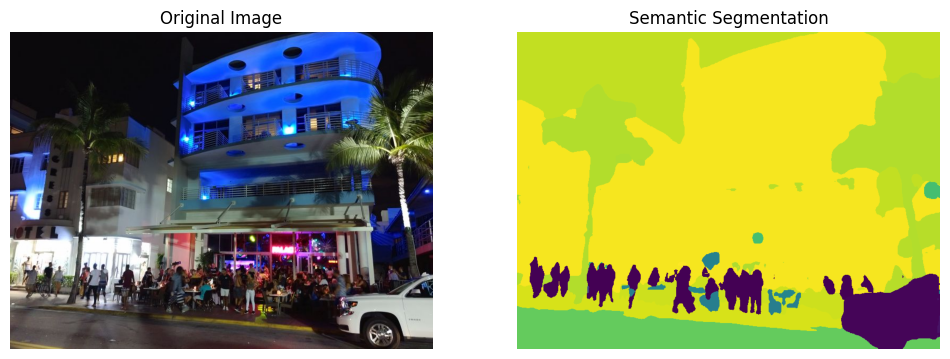

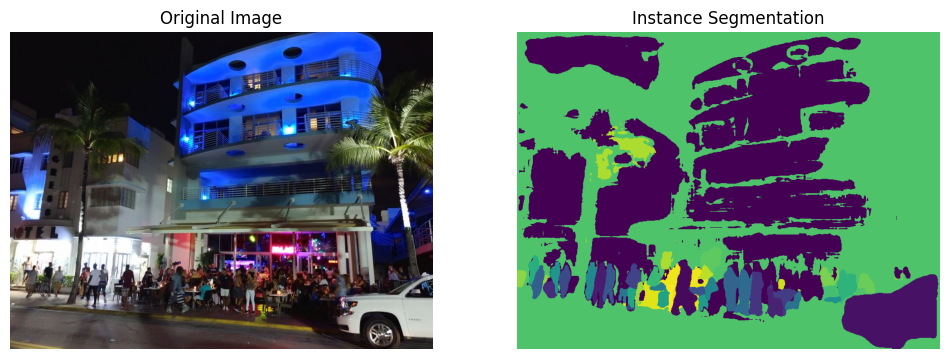

`label_ids_to_fuse` unset. No instance will be fused.


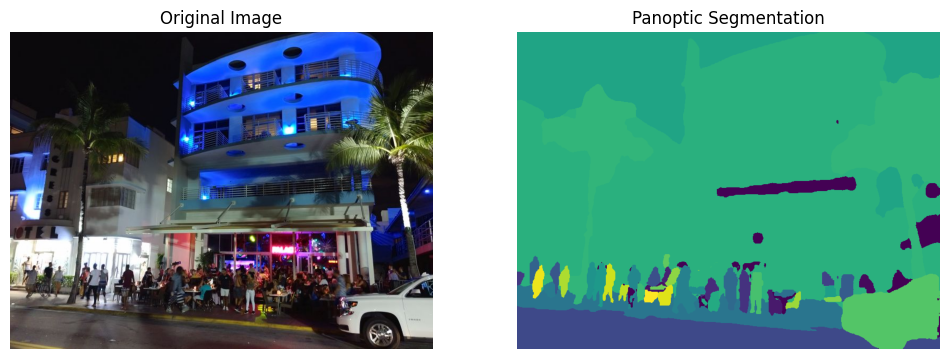

Picture: motorcycle.jpg


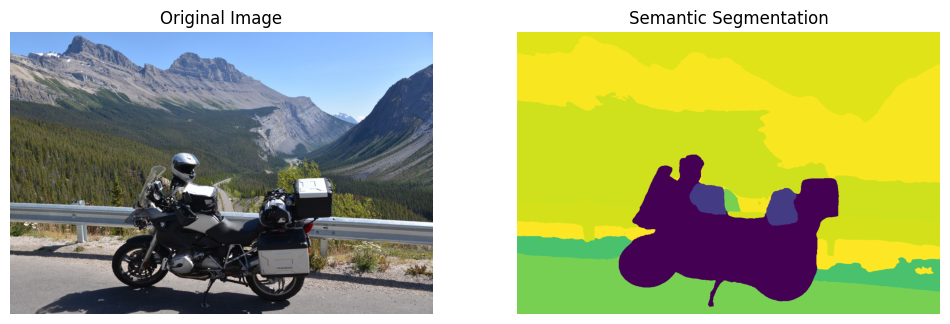

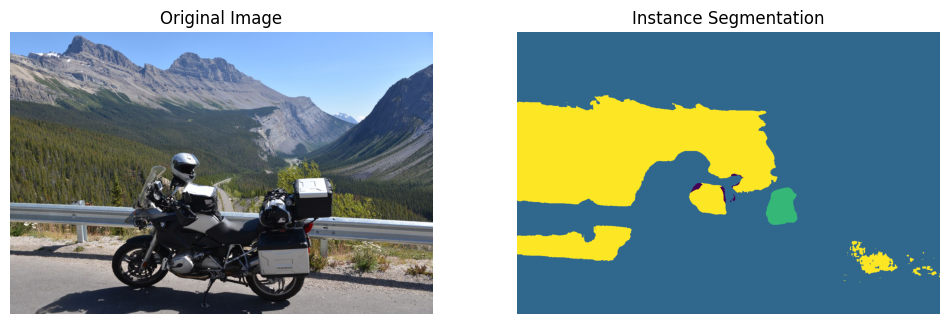

`label_ids_to_fuse` unset. No instance will be fused.


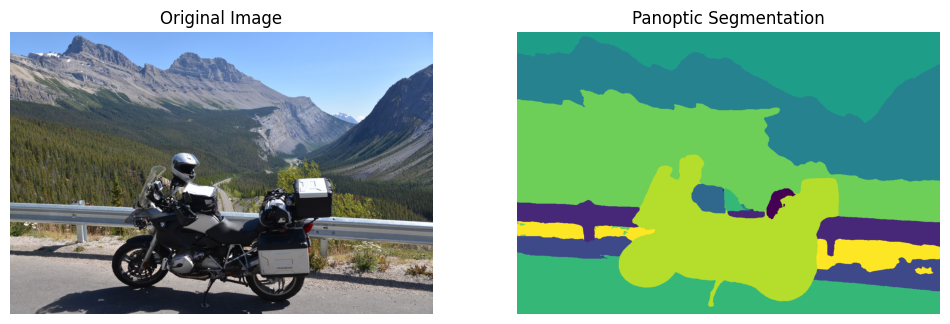

Picture: motorcycles.jpg


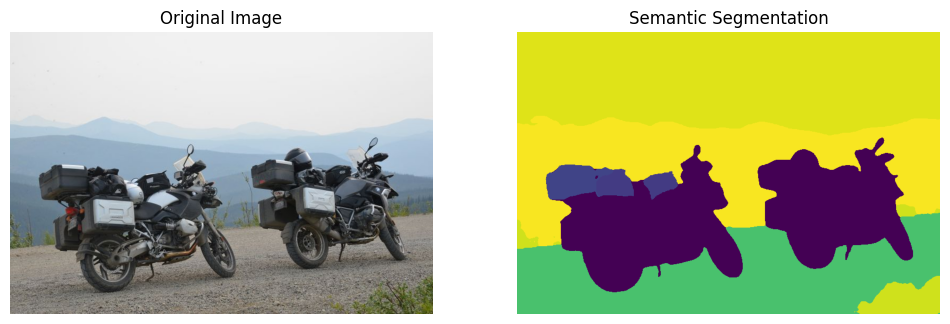

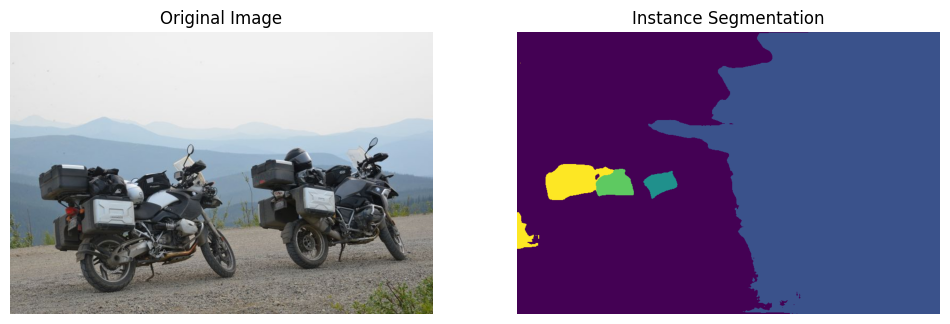

`label_ids_to_fuse` unset. No instance will be fused.


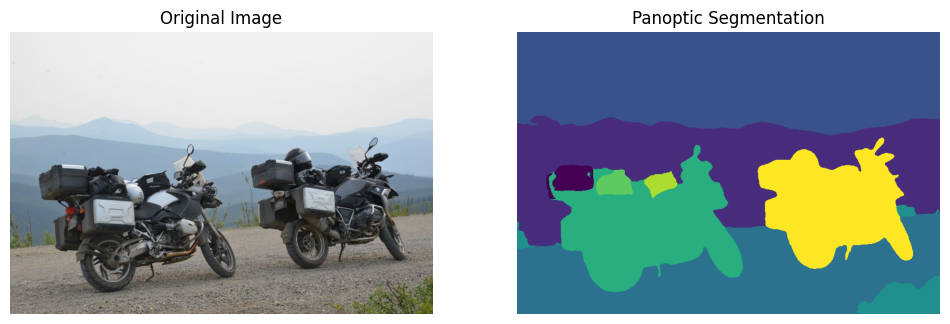

Picture: ships.jpg


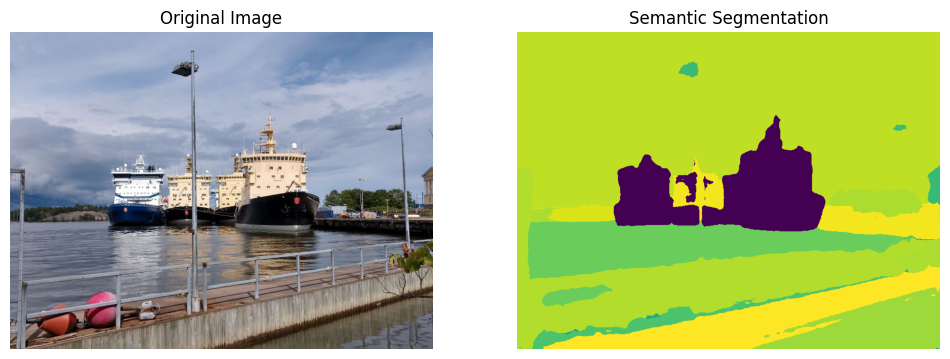

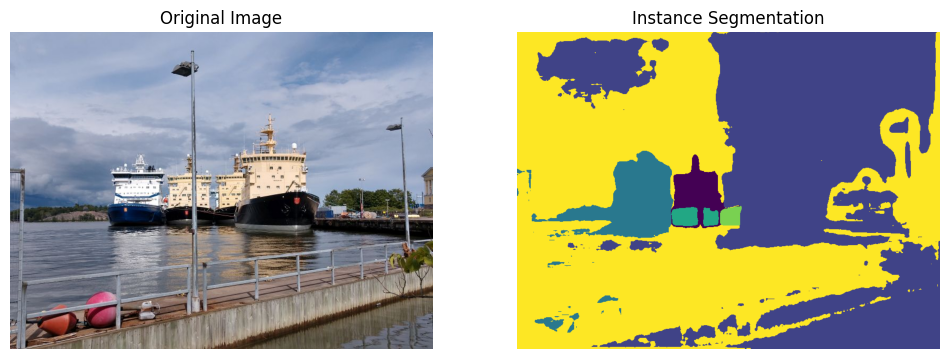

`label_ids_to_fuse` unset. No instance will be fused.


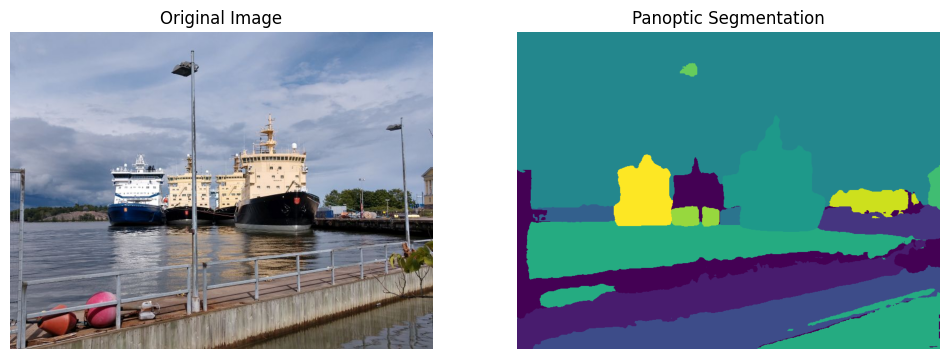

Picture: traffic.jpg


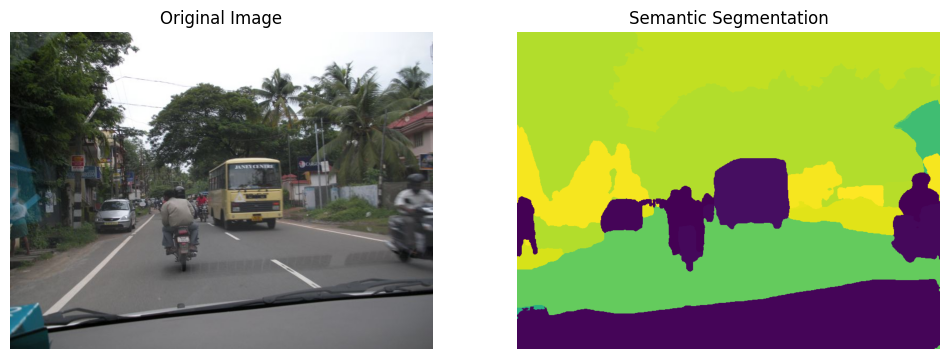

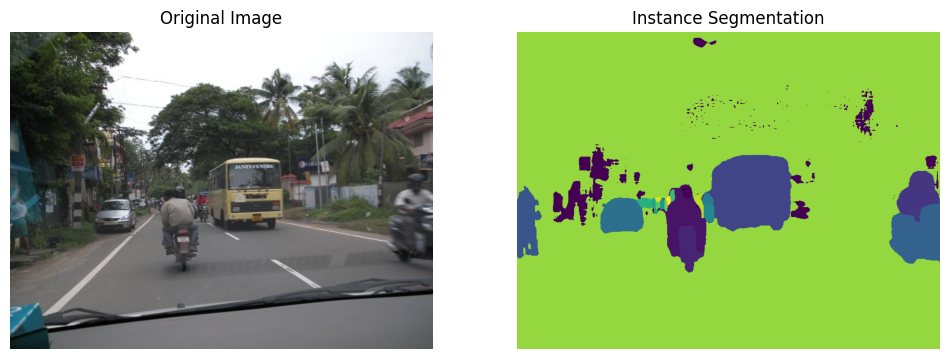

`label_ids_to_fuse` unset. No instance will be fused.


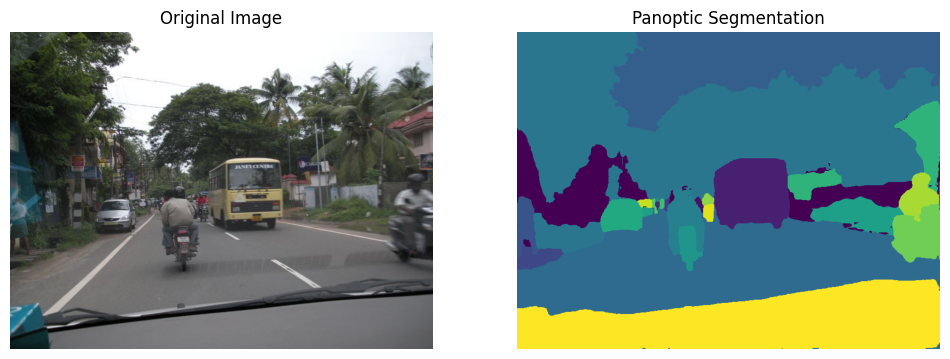

In [9]:
images_path = "images"

# Loop through all images in the directory
for filename in os.listdir(images_path):
    file_path = os.path.join(images_path, filename)

    # Only process image files
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        print(f"Picture: {filename}")
        image = Image.open(file_path)

        #processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_ade20k_swin_large")  
        #model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_large")
        processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_coco_swin_large")  
        model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_coco_swin_large")

        # Semantic Segmentation
        inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt")
        outputs = model(**inputs)
        predicted_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
        show_image_comparison(image, predicted_map, "Semantic Segmentation")

        # Instance Segmentation
        inputs = processor(images=image, task_inputs=["instance"], return_tensors="pt")
        outputs = model(**inputs)
        predicted_map = processor.post_process_instance_segmentation(outputs, target_sizes=[image.size[::-1]])[0]["segmentation"]
        show_image_comparison(image, predicted_map, "Instance Segmentation")

        # Panoptic Segmentation
        inputs = processor(images=image, task_inputs=["panoptic"], return_tensors="pt")
        outputs = model(**inputs)
        predicted_map = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]["segmentation"]
        show_image_comparison(image, predicted_map, "Panoptic Segmentation")
